### Data Source from IBGE: Instituto Brasileiro de Geografia e Estatistica (Brazilian Institute of Geography and Statistics)

#### Data from 2015

### Variable Used

> ### Income
***

Monthly income from main work for persons aged 10 years and over.


> ### State
***

States of Brazil

|COD|Identification|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Gender
***

|COD|Identification|
|---|---|
|0|Male|
|1|Female|

> ### Years of Study
***

|COD|Identification|
|---|---|
|1|Without instruction or less than 1 year|
|2|1 year|
|3|2 years|
|4|3 years|
|5|4 years|
|6|5 years|
|7|6 years|
|8|7 years|
|9|8 years|
|10|9 years|
|11|10 years|
|12|11 years|
|13|12 years|
|14|13 years|
|15|14 years|
|16|15 years or more|
|17|Not determined| 
||Not applicable|

> ### Ethnicity
***

|COD|Identification|
|---|---|
|0|Indian|
|2|Caucasian|
|4|Dark Colored Skin|
|6|Asian|
|8|Dark Colored Skin (Pardo)|
|9|Without declaration|

## 1 - Analysing all variables

In [91]:
import pandas as pd

In [92]:
data = pd.read_csv('dados.csv')
data.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [93]:
data.drop(labels = 'Altura', axis=1, inplace = True)

In [94]:
data.rename(columns = {'UF':'State', 'Sexo':'Gender', 'Idade':'Age', 'Cor':'Ethnicity', 'Anos de Estudo': 'Years of Study', 'Renda':'Income'}, inplace = True)

In [95]:
data.describe()

,State,Gender,Age,Ethnicity,Years of Study,Income
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000


In [96]:
frequency = data['Gender'].value_counts()
frequency

0    53250
1    23590
Name: Gender, dtype: int64

In [97]:
percentual = data['Gender'].value_counts(normalize = True)*100
percentual

0    69.299844
1    30.700156
Name: Gender, dtype: float64

In [98]:
freq_distr = pd.DataFrame({'Frequency': frequency, 'Percentual': percentual})
freq_distr

,Frequency,Percentual
0,53250,69.299844
1,23590,30.700156


In [99]:
# Encode integers (0 and 1) to "Male" and "Female", respectively
freq_distr.rename(index = {0: 'Male', 1: 'Female'}, inplace = True)
freq_distr.rename_axis('Gender', axis = 'columns', inplace = True)
freq_distr

Gender,Frequency,Percentual
Male,53250,69.299844
Female,23590,30.700156


In [100]:
gender = {0: 'Male',
        1: 'Female'}

ethnicity = {0: 'Indian',
        2: 'Caucasian',
        4: 'Dark Colored Skin',
        6: 'Asian',
        8: 'Dark Colored Skin (Pardo)',
        9: 'Without declaration'}
percentage = pd.crosstab(data['Gender'], data['Ethnicity'], normalize = True)*100
percentage.rename(index = gender, inplace = True)
percentage.rename(columns = ethnicity, inplace = True)
percentage

Ethnicity,Indian,Caucasian,Dark Colored Skin,Asian,Dark Colored Skin (Pardo)
Gender,,,,,
Male,0.333160,28.883394,7.160333,0.305830,32.617126
Female,0.131442,12.520822,3.759761,0.152264,14.135867


In [101]:
percentage = pd.crosstab(data['Gender'], data['Ethnicity'], aggfunc = 'mean', values = data['Income'])
percentage.rename(index = gender, inplace = True)
percentage.rename(columns = race, inplace = True)
percentage

Ethnicity,Indian,Caucasian,Dark Colored Skin,Asian,Dark Colored Skin (Pardo)
Gender,,,,,
Male,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Female,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [102]:
income_medians = pd.crosstab(data['Gender'], data['Ethnicity'], aggfunc = 'median', values = data['Income'])
income_medians.rename(index = gender, inplace = True)
income_medians.rename(columns = race, inplace = True)
income_medians

Ethnicity,Indian,Caucasian,Dark Colored Skin,Asian,Dark Colored Skin (Pardo)
Gender,,,,,
Male,797.5,1700.0,1200.0,2800.0,1200.0
Female,788.0,1200.0,800.0,1500.0,800.0


## Conclusion: 
### Here we can analyse that:
###  - Man earn more than woman; 
###  - Asian and Caucasian Man, in this order, earn more compared with others.

## 2 - Analysing the variable Income

C:\Users\caiom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

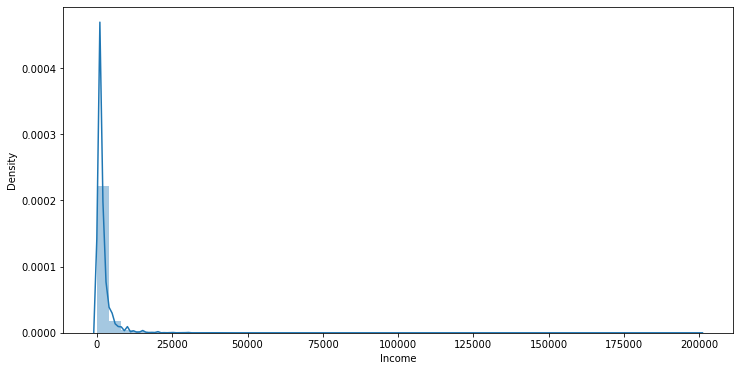

In [103]:
import seaborn as sns
ax = sns.distplot(data.Income)
ax.figure.set_size_inches(12,6)
ax

In [104]:
### It is noticeable the presence of outliers

In [105]:
### As the graph became to small, we can use a query to reduce the interval of the Income

C:\Users\caiom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

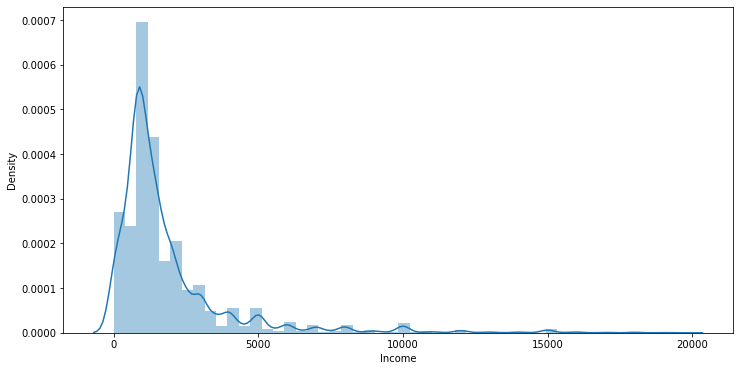

In [106]:
ax = sns.distplot(data.query('Income<20000').Income)
ax.figure.set_size_inches(12,6)
ax

### Conclusion 1: Analysing the graph is possible to see that most of the people earn less then  <b>R$ 5.000,00</b>. To complete the analysis, is necessary to separate the incomes into seccions  

<b>A</b>: Oven than 20 MI

<b>B</b>: From 10 to 20 MI

<b>C</b>: From 4 to 10 MI

<b>D</b>: From 2 to 4 MI

<b>E</b>: Until 2 MI

where <b>MI</b> is the value of minimum income at the time. At this case is <b>R$ 788,00</b> (2015):

<b>A</b>: Oven than 15.760

<b>B</b>: From 7.880 to 15.760

<b>C</b>: From 3.152 to 7.880

<b>D</b>: From 1.576 to 3.152

<b>E</b>: Until 1.576


In [107]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [108]:
frequency = (pd.cut(x = data.Income,
           bins = classes,
           labels = labels,
           include_lowest = True)).value_counts()
frequency

E    49755
D    16700
C     7599
B     2178
A      608
Name: Income, dtype: int64

In [109]:
percentage = pd.value_counts(pd.cut(x = data.Income,
       bins = classes,
       labels = labels,
       include_lowest = True),
              normalize = True)
percentage

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Income, dtype: float64

In [110]:
personalised_freq_distr = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})
personalised_freq_distr

,Frequency,Percentage
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


### Conclusion 2: As was possible to see, the class E (earn less than 2 Minimin Income) have more records.

## 3 - Doing a Hypothesis Test

### Now we will use hypothesis test to verify if the Income of Man are less than Woman, using the significance level = 1%

### $\mu_1 \Rightarrow$ Average income of male heads of households
### $\mu_2 \Rightarrow$ Average income of female heads of households

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

##### OBS: It is important to note that to use the hypothesis test, the sample distribution have to be a normal, we have to consider the number of samples, population and sample standard deviation. For this analysis, these rules were disregarded.

In [111]:
man = data.query('Gender == 0').Income
woman = data.query('Gender == 1').Income

In [112]:
significance = 0.01
confidence = 1 - significance

In [113]:
from scipy.stats import norm
z_alpha = norm.ppf(confidence)
z_alpha

2.3263478740408408

In [114]:
from statsmodels.stats.weightstats import DescrStatsW
test_Man = DescrStatsW(man)
test_Woman = DescrStatsW(woman)
test_A = test_Man.get_compare(test_Woman)

In [115]:
z, p_value = test_A.ztest_ind(alternative='larger', value=0)
print(z)
print(p_value)

24.159180933661972
2.9896498343763234e-129


In [116]:
z>=z_alpha

True

In [117]:
p_value<=significance

True

### Conclusion: With a confidence level of 99%, we reject 𝐻0 , that is, we conclude that the average income of male heads of households is greater than the average of female heads of households. Confirming the allegation of income inequality between the gender.

## 4 - Linear Regression 

In [118]:
# Analysing the correlation between the variables
data.corr()

,State,Gender,Age,Ethnicity,Years of Study,Income
State,1.000000,0.001479,0.019818,-0.252820,0.123380,0.127939
Gender,0.001479,1.000000,0.002994,-0.003193,0.115662,-0.086826
Age,0.019818,0.002994,1.000000,-0.058952,-0.267614,0.041357
Ethnicity,-0.252820,-0.003193,-0.058952,1.000000,-0.173609,-0.151921
Years of Study,0.123380,0.115662,-0.267614,-0.173609,1.000000,0.332152
Income,0.127939,-0.086826,0.041357,-0.151921,0.332152,1.000000


In [119]:
# Separating the variable with the highest correlation (Income and Years of Study)
Y = data.Income
X = data['Years of Study']

In [120]:
# Tranform in a DataFrame
dataframe_X = pd.DataFrame(X)
dataframe_Y = pd.DataFrame(Y)
dataframe = pd.concat([dataframe_X,dataframe_Y], axis = 1, join = 'inner')
dataframe.head(5)

,Years of Study,Income
0,12,800
1,12,1150
2,15,880
3,6,3500
4,9,150


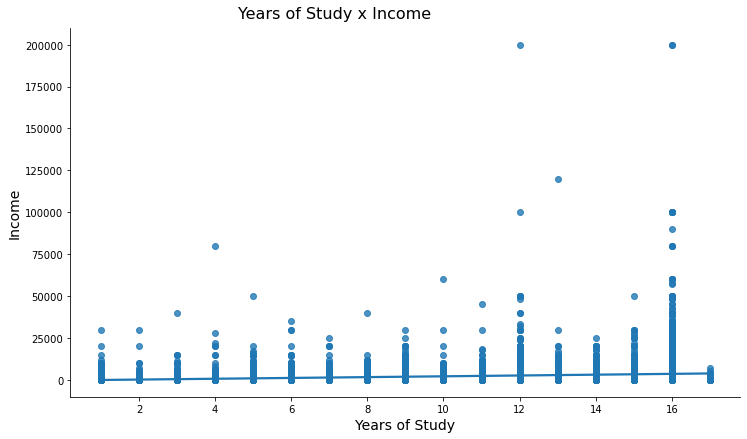

In [121]:
# Ploting a graph with linear regression
import seaborn as sns
ax = sns.lmplot(x= 'Years of Study', y = 'Income', data=dataframe)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Years of Study x Income', fontsize=16, y = 1.02)
ax.set_xlabels("Years of Study", fontsize=14)
ax.set_ylabels("Income", fontsize=14)
ax

In [122]:
# Doing the Linear Regression
import statsmodels.api as sm
# Y = Income
# X = Years of Study
Y = dataframe.Income
X = sm.add_constant(dataframe['Years of Study'])

C:\Users\caiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [123]:
Y.head()

0     800
1    1150
2     880
3    3500
4     150
Name: Income, dtype: int64

In [124]:
X.head()

,const,Years of Study
0,1.0,12
1,1.0,12
2,1.0,15
3,1.0,6
4,1.0,9


In [125]:
regression_result = sm.OLS(Y, X).fit()

In [126]:
print(regression_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     9528.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:54:17   Log-Likelihood:            -7.2762e+05
No. Observations:               76840   AIC:                         1.455e+06
Df Residuals:                   76838   BIC:                         1.455e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -302.1337     26.159    -11.

In [127]:
regression_result.params

const            -302.133737
Years of Study    243.146629
dtype: float64

> ### Years of Study
***

|COD|Identification|
|---|---|
|1|Without instruction or less than 1 year|
|2|1 year|
|3|2 years|
|4|3 years|
|5|4 years|
|6|5 years|
|7|6 years|
|8|7 years|
|9|8 years|
|10|9 years|
|11|10 years|
|12|11 years|
|13|12 years|
|14|13 years|
|15|14 years|
|16|15 years or more|
|17|Not determined| 
||Not applicable|


In [129]:
# Making a prediction
regression_result.predict([1, 12])[0]

2615.625809548629